# Sect 31-Pt2 & 32: Intro to Time Series

- From 12/19/19  study group

## Learning Objectives:
- `pd.grouper`

- Learn about types of time series trends and how to remove them.
- Learn about seasonal decomposition`statsmodels.tsa.seasonal.seasonal_decompose`

- Learn about PACF, ACF
- Introduce ARIMA and SARIMA models.



 ## Questions to Revisit
 - Can you interpolate between missing datapoints?
     - `pd.Series.interpolate` 
     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html
 

## References

- [Pandas Timeseries Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- ['Timeseries Offset Aliases'](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
- [Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

**REFERENCE CONTENTS:**
- Date StrFormatting
    - Used for:
        - Recognizing Date Formats (`pd.to_datetime`)
        - `dt_obj.strftime()`
        
- Pandas Frequency Aliases
    - Used for:
        - `df.resample()`
        - `df.asfreq()`
        - ...
        

## Reference Tables

### Date Str Formatting




Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

### Pandas Frequency Aliases


https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

|Alias	| Description|
| --- | --- |
|B |	business day frequency|
|C |	custom business day frequency|
|D |	calendar day frequency|
|W |	weekly frequency|
|M |	month end frequency|
|SM |	semi-month end frequency (15th and end of month)|
|BM |	business month end frequency|
|CBM |	custom business month end frequency|
|MS |	month start frequency|
|SMS |	semi-month start frequency (1st and 15th)|
|BMS |	business month start frequency|
|CBMS |	custom business month start frequency|
|Q |	quarter end frequency|
|BQ |	business quarter end frequency|
|QS |	quarter start frequency|
|BQS |	business quarter start frequency|
|A, Y |	year end frequency|
|BA, BY |	business year end frequency|
|AS, YS |	year start frequency|
|BAS, BYS |	business year start frequency|
|BH | business hour frequency|
|H | hourly frequency|
|T |  min	minutely frequency|
|S | secondly frequency|
|L |  ms	milliseconds|
|U |  us	microseconds|
|N | nanoseconds|

# Intro to Time Series

In [1]:
## Uncomment Below to Update Packages
# !pip install -U fsds_100719
# %conda update matplotlib
# %conda update scikit-learn
# %conda update pandas
from fsds_100719.imports import *

pd.set_option('precision',3)

fsds_1007219  v0.7.21 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [3]:
import sklearn
mods = [pd,mpl,sklearn]
[print(f"{mod.__name__} V {mod.__version__}") for mod in mods];

pandas V 1.0.3
matplotlib V 3.1.3
sklearn V 0.22.1


# Baltimore Crime

## 2020 Data

> Instructor Note: REMOVE PARSE DATES AND INDEX_COL PARAMETERS FROM READ_CSV AT FIRST FOR STUDY GROUP

In [4]:
# import os,sys
# file = 'https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/datasets/baltimore_crime_2020.csv'#'../../datasets/baltimore_crime_2020.csv'
# df = pd.read_csv(file,low_memory=False)

In [5]:
## Make datetime index
#datetime = pd.to_datetime(df['CrimeDate']+ ' - ' + df['CrimeTime'])
#datetime 

In [6]:
## Set datetime index
# df.set_index('datetime',inplace=True)
# df.index

In [7]:
import os,sys
file = 'https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/datasets/baltimore_crime_2020.csv'#'../../datasets/baltimore_crime_2020.csv'
df = pd.read_csv(file,low_memory=False,parse_dates=['datetime'],index_col=['datetime'])
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
datetime,,,,,,,,,,,,,,,,
2020-04-25 17:30:00,04/25/2020,17:30:00,5A,2400 SHIRLEY AVE,BURGLARY,I,NaN,533.0,NORTHERN,GREENSPRING,-76.657,39.336,NaN,ROW/TOWNHOUSE-VAC,NaN,1
2020-04-25 02:40:00,04/25/2020,02:40:00,5A,2900 MOUNT HOLLY ST,BURGLARY,I,NaN,624.0,NORTHWEST,WINDSOR HILLS,-76.683,39.320,NaN,ROW/TOWNHOUSE-VAC,NaN,1
2020-04-25 09:30:00,04/25/2020,09:30:00,5C,0 N JANNEY ST,BURGLARY,I,NaN,232.0,SOUTHEAST,KRESSON,-76.561,39.293,NaN,ROW/TOWNHOUSE-VAC,NaN,1
2020-04-25 02:30:00,04/25/2020,02:30:00,4E,900 W SARATOGA ST,COMMON ASSAULT,NaN,NaN,712.0,WESTERN,POPPLETON,-76.632,39.292,NaN,NaN,NaN,1
2020-04-25 15:30:00,04/25/2020,15:30:00,6C,3700 BOSTON ST,LARCENY,I,NaN,231.0,SOUTHEAST,CANTON INDUSTRIAL AREA,-76.565,39.277,NaN,GROCERY/CONFECTION,NaN,1


In [8]:
df.tail()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
datetime,,,,,,,,,,,,,,,,
1978-01-01 10:30:00,01/01/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421.0,NORTHEAST,MORGAN STATE UNIVERS,-76.582,39.340,NaN,ROW/TOWNHOUSE-OCC,NaN,1
1977-05-01 00:01:00,05/01/1977,00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531.0,NORTHERN,WYMAN PARK,-76.627,39.329,NaN,ROW/TOWNHOUSE-OCC,NaN,1
1975-06-01 00:00:00,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822.0,SOUTHWEST,UPLANDS,-76.691,39.290,NaN,OTHER - INSIDE,NaN,1
1969-07-20 21:00:00,07/20/1969,21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534.0,NORTHERN,ROLAND PARK,-76.635,39.359,NaN,NaN,NaN,1
1963-10-30 00:00:00,10/30/1963,00:00:00,2A,3100 FERNDALE AVE,RAPE,I,OTHER,622.0,NORTHWEST,HOWARD PARK,-76.703,39.327,NaN,ROW/TOWNHOUSE-OCC,NaN,1


In [9]:
df.sort_index(ascending=False)

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
datetime,,,,,,,,,,,,,,,,
2020-04-25 23:55:00,04/25/2020,23:55:00,4C,5900 MORAVIA RD,AGG. ASSAULT,NaN,OTHER,443.0,NORTHEAST,FRANKFORD,-76.545,39.317,NaN,NaN,NaN,1
2020-04-25 23:55:00,04/25/2020,23:55:00,4C,5900 MORAVIA RD,AGG. ASSAULT,O,OTHER,443.0,NORTHEAST,FRANKFORD,-76.545,39.317,NaN,STREET,NaN,1
2020-04-25 23:55:00,04/25/2020,23:55:00,6J,5900 MORAVIA RD,LARCENY,NaN,NaN,443.0,NORTHEAST,FRANKFORD,-76.545,39.317,NaN,NaN,NaN,1
2020-04-25 23:45:00,04/25/2020,23:45:00,4E,3400 GARRISON BLVD,COMMON ASSAULT,I,NaN,621.0,NORTHWEST,DORCHESTER/GRAN-BARR,-76.683,39.328,NaN,APT/CONDO - OCCUPIED,NaN,1
2020-04-25 23:00:00,04/25/2020,23:00:00,6D,1600 ASHLAND AVE,LARCENY FROM AUTO,O,NaN,323.0,EASTERN,GAY STREET,-76.596,39.300,NaN,STREET,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,04/23/2015,NaN,9S,900 HARLEM AV,SHOOTING,Inside,FIREARM,NaN,WESTERN,NaN,-76.633,39.297,NaN,COMMON BUSINESS,Central,1
NaT,10/07/2014,NaN,1A,3000 N HILTON ST,HOMICIDE,Outside,FIREARM,621.0,NORTHWEST,NaN,-76.673,39.320,NaN,STREET,NaN,1
NaT,06/27/2014,NaN,1A,2500 LOYOLA NORTHWAY,HOMICIDE,Inside,FIREARM,531.0,NORTHERN,NaN,-76.661,39.340,NaN,DWELLING,NaN,1


In [10]:
df = df.loc['2014':'2020']

In [11]:
crime_counts = pd.DataFrame({'Count':df['Description'].value_counts(),
                             '% of Total':df['Description'].value_counts(normalize=True)})
crime_counts.style.bar('% of Total')

,Count,% of Total
LARCENY,67150,0.224
COMMON ASSAULT,49600,0.165
BURGLARY,43110,0.144
LARCENY FROM AUTO,39757,0.132
AGG. ASSAULT,32707,0.109
AUTO THEFT,26456,0.088
ROBBERY - STREET,21294,0.071
ROBBERY - COMMERCIAL,5312,0.018
SHOOTING,3978,0.013
ROBBERY - RESIDENCE,3120,0.010


In [12]:
## Identify columns to drop/keep
drop_cols = ['CrimeDate','CrimeTime','CrimeCode','Location', 
             'Premise','Post','Neighborhood','Location 1',
             'vri_name1','Total Incidents','Weapon','Inside/Outside']

id_cols = ['Description','Weapon','Longitude','Latitude']

In [13]:
## 
df.drop(columns=drop_cols,inplace=True)
df

,Description,District,Longitude,Latitude
datetime,,,,
2020-04-25 17:30:00,BURGLARY,NORTHERN,-76.657,39.336
2020-04-25 02:40:00,BURGLARY,NORTHWEST,-76.683,39.320
2020-04-25 09:30:00,BURGLARY,SOUTHEAST,-76.561,39.293
2020-04-25 02:30:00,COMMON ASSAULT,WESTERN,-76.632,39.292
2020-04-25 15:30:00,LARCENY,SOUTHEAST,-76.565,39.277
...,...,...,...,...
2014-01-01 15:00:00,LARCENY,NORTHERN,-76.595,39.357
2014-01-01 08:35:00,ROBBERY - STREET,SOUTHEAST,-76.558,39.287
2014-01-01 23:30:00,ROBBERY - STREET,SOUTHEAST,-76.603,39.289


In [14]:
crime_types= df['Description'].unique()
crime_types

array(['BURGLARY', 'COMMON ASSAULT', 'LARCENY', 'ROBBERY - STREET',
       'AUTO THEFT', 'AGG. ASSAULT', 'LARCENY FROM AUTO', 'SHOOTING',
       'ROBBERY - RESIDENCE', 'ROBBERY - COMMERCIAL', 'ARSON', 'HOMICIDE',
       'ROBBERY - CARJACKING', 'RAPE'], dtype=object)

In [15]:
## make a dict of all crime types 
CRIMES = {}
for crime in crime_types:
    ## get crime df
    group_df  = df.groupby('Description').get_group(crime).copy()
    
    ## Make a column with the crime 
    group_df[crime.lower()] = (group_df['Description'] == crime).astype(int)
    group_df.drop(columns=['Description'],inplace=True)

    CRIMES[crime.lower()] = group_df

In [16]:
CRIMES.keys()

dict_keys(['burglary', 'common assault', 'larceny', 'robbery - street', 'auto theft', 'agg. assault', 'larceny from auto', 'shooting', 'robbery - residence', 'robbery - commercial', 'arson', 'homicide', 'robbery - carjacking', 'rape'])

In [17]:
dfc = CRIMES['shooting']
dfc.index

DatetimeIndex(['2020-04-25 16:09:00', '2020-04-24 15:59:00',
               '2020-04-22 22:30:00', '2020-04-22 17:49:00',
               '2020-04-22 17:55:00', '2020-04-22 00:49:00',
               '2020-04-22 00:49:00', '2020-04-21 12:15:00',
               '2020-04-21 19:54:00', '2020-04-21 01:58:00',
               ...
               '2014-01-13 18:10:00', '2014-01-12 21:29:00',
               '2014-01-12 16:59:00', '2014-01-09 14:58:00',
               '2014-01-08 02:37:00', '2014-01-05 16:30:00',
               '2014-01-05 19:41:00', '2014-01-03 14:32:00',
               '2014-01-01 17:35:00', '2014-01-01 22:31:00'],
              dtype='datetime64[ns]', name='datetime', length=3978, freq=None)

In [18]:
TS = {}
for crime,group_df in CRIMES.items():
    ts = group_df[crime]#.resample('D').sum()
    TS[crime]=ts

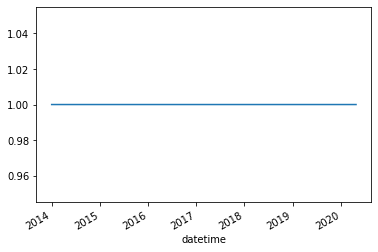

In [19]:
TS['shooting'].plot()

In [20]:
mpl.rcParams['figure.figsize'] = (12,4)

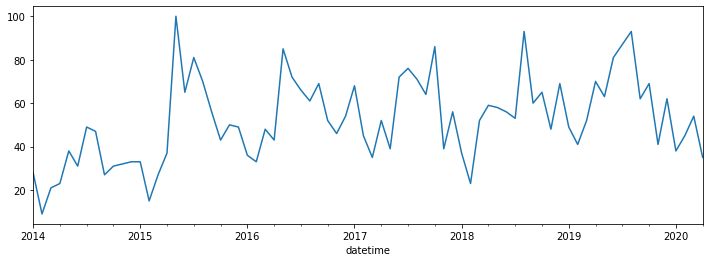

In [21]:
ts = TS['shooting'].resample('M').sum()#.asfreq('D')
ts.plot()

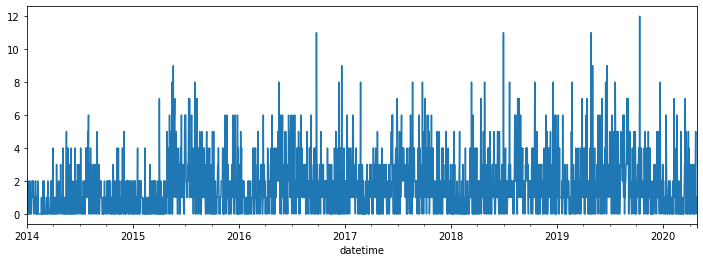

In [22]:
ts = TS['shooting'].resample('D').sum().asfreq('D')
ts.plot()

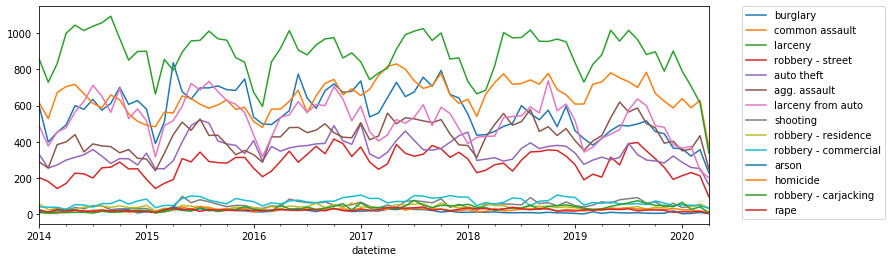

In [24]:
fig,ax = plt.subplots()
for crime in CRIMES:
    ts = TS[crime].resample('M').sum()
    ts.plot(label=crime)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


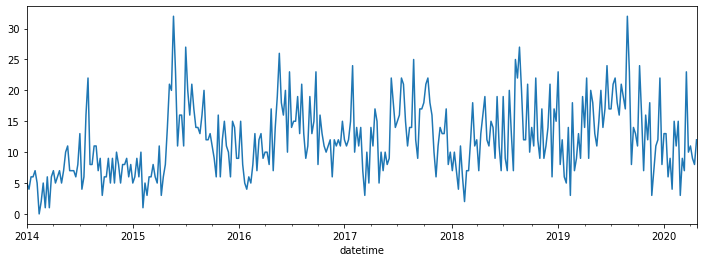

In [29]:
TS['shooting'].resample('W').sum().plot()

In [26]:
stop

NameError: name 'stop' is not defined

# OLD

## Baltimore Crime - 2019 Data

In [ ]:
baltimore_crime ="https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/BPD_Part_1_Victim_Based_Crime_Data.csv"
df = pd.read_csv(baltimore_crime,low_memory=False,
                 parse_dates=["CrimeDate","CrimeTime"])#,
#                 index_col='CrimeDate')
display(df.head())
mpl.rcParams['figure.figsize']= (12,8)
df.index

In [ ]:
df['datetime'] =df['CrimeDate'] #'CrimeTime'].copy()
df.set_index('datetime',inplace=True)
df.sort_index(inplace=True)
df

In [ ]:
df.sort_index(inplace=True)
df = df.loc['2014':].copy()
df.index

### Which crimes were the most common?

In [ ]:
ax=df["Description"].value_counts(ascending=True).plot(kind='barh')
ax.set_xlabel('Number of Crimes')

In [ ]:
ax=df["Description"].value_counts(ascending=True, normalize=True).plot(kind='barh')
# ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%d.2\%"))
ax.set_xlabel('Portion of Crimes')

In [ ]:
df.head()

### Making df_crimes

In [ ]:
pd.set_option('display.max_columns',0)

In [ ]:
df_crimes = pd.get_dummies(df,columns=['Description'])
df_crimes

___

In [ ]:
crime_cols = [col for col in df_crimes.columns if 'Description_' in col]
crime_cols

In [ ]:
new_names = [x.replace('Description_','') for x in crime_cols]
new_names

In [ ]:
df_crimes.columns

In [ ]:
rename_dict = dict(zip(crime_cols,new_names))
rename_dict

In [ ]:
df_crimes.rename(rename_dict,axis=1,inplace=True)
df_crimes

In [ ]:
df_crimes

In [ ]:
# df_crimes['datetime'] = df_crimes['CrimeDate'].copy()
# df_crimes.set_index('datetime',inplace=True)
# df_crimes

### Visualize then Get Counts

In [ ]:
keep_cols = ['CrimeDate','CrimeTime']
keep_cols.extend(new_names)
keep_cols

In [ ]:
df_crimes = df_crimes[keep_cols].copy()
df_crimes

In [ ]:
df_crimes.groupby('CrimeDate')[new_names].sum().plot()

### Using `pd.Grouper`

In [ ]:
df_crimes.groupby(pd.Grouper(freq='D')).sum().plot()

In [ ]:
df_counts = df_crimes.groupby(pd.Grouper(freq='D')).sum()
df_counts.plot()

In [ ]:
df_counts['SHOOTING'].plot()

In [ ]:
for freq_code in ['D','W','M']:
    ax= df_crimes.groupby(pd.Grouper(freq=freq_code)).sum().plot()
    ax.set_title(f"Freq Code={freq_code}")
#     ax.legend(None)
    

### Working with df_counts


In [ ]:
df_counts.to_csv('datasets/baltimore_crime_counts_2014-2019.csv')
df_counts = pd.read_csv('datasets/baltimore_crime_counts_2014-2019.csv',parse_dates=True, index_col='datetime')
df_counts

# Removing Trends 
- .diff()
- np.log
- subtract rolling mean
- seasonal decomposition

In [ ]:
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['sig'] = dfoutput['p-value']<.05
    print (dfoutput)
    
    return dfoutput

In [ ]:
col = 'COMMON ASSAULT'
ts = df_counts[col].copy()
ts.loc['2014':'2016'].plot(figsize=(12,4))#style='.b')

## Seasonal Decomposition

In [ ]:
ts=ts.loc['2014':'2016']

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts)#,model='mul')
decomp.plot();

In [ ]:
trend = decomp.trend
residuals = decomp.resid
seasonal = decomp.seasonal

In [ ]:
ts.plot()
residuals.plot(label='Residuals')
plt.legend()

In [ ]:
fs.ihelp(stationarity_check,False)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller()

In [ ]:
stationarity_check(ts);

In [ ]:
ts.interpolate(method='time',inplace=True)
decomp = seasonal_decompose(ts)


In [ ]:
stationarity_check(ts)

In [ ]:
stationarity_check(decomp.resid.dropna());

- .diff()
- np.log
- subtract rolling mean
- seasonal decomposition

In [ ]:
ts.plot()

In [ ]:

# plt.plot(np.log(ts))

# ACF & PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
mpl.rcParams['figure.figsize'] = (12,4)
plot_acf(ts);
plt.xlabel("Number Lag")
# fig=ax.get_figure()

# fig.set_size_inches(12,4)
# fig


In [ ]:

ts.plot()

#  ARIMA/SARIMA
- SEE `sect_32_time_series_models.ipynb`

# HOUSING DATA FROM LAST CLASS

In [ ]:
df = fs.datasets.load_mod1_proj()
df.head()

In [ ]:
df.info()

In [ ]:
date = pd.to_datetime(df['date'])
date

In [ ]:
df['d_date'] = pd.to_datetime(df['date'])
display(df.head())
df.dtypes

In [ ]:
df.set_index('d_date',inplace=True)
df.index

In [ ]:
mpl.rcParams['figure.figsize'] = (12,6)

In [ ]:
df['price'].plot()

### Slicing With Time Series

- Make sure you're index is sorted first'
- Feed in 2 dates as strings for slicing.
- Always use .loc when slicing dates

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.loc['2014-05-01':'2015-05-01','price'].plot().autoscale(axis='x',tight=True)

## Time series Frequencies


In [ ]:
df.index

In [ ]:
df.index

In [ ]:
ts = df['price']

In [ ]:
freq_codes = ['D','3D','W','M', 'Q']
for freq in freq_codes:
    plt.figure()
    title=f"Freq Code: {freq}"
    plt.legend()
    ts.resample(freq).mean().plot(title=title)
    
ax = ts.resample('M').mean().plot(kind='bar')

In [ ]:

ts.resample('D').mean().plot()

## Using Datetime objects and apply statemements

In [ ]:
display(df.head())
df.dtypes

In [ ]:
t = df.index.to_series()[0]
display(t)
print(t)

In [ ]:
# help(t.strptime)

In [ ]:
print(t.strftime("%m-%d-%Y"))
print(t.strftime("%T"))

In [ ]:
df.index

In [ ]:
df['month'] = df.index.to_series().apply(lambda x: x.month)
df.head()


In [ ]:
## Let's make a month column to groupby
df['month_int'] = df.index.to_series().apply(lambda x: x.month) #x
df['month_name'] =df.index.to_series().apply(lambda x:x.strftime("%B"))

for col in ['month_int','month_name']:
    display(df[col].value_counts(normalize=True))

In [ ]:
df.index.to_series().apply(lambda x: x.month)

In [ ]:
help(ax.xaxis.set_ticklabels)

In [ ]:
fig = ax.get_figure()

In [ ]:
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(),**{'rotation':45,
                                                    'ha':'right'}) 
# ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator())
fig